## 3표본 평균(분산, 수치) 차이분석 ==> ANOVA(Analysis of Variance) test

In [13]:
# -*- coding: utf-8 -*-
#import 컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot
from matplotlib import pyplot
import numpy as np
from scipy import stats
import statsmodels.api as sm
import math

In [14]:
#import spm1d
#import rft1d
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [15]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon2.csv', skipinitialspace=True)

In [16]:
#변수 확인
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

    no  type  category    amount  week
0   42     1       1.0  159000.0   1.0
1  194     1       1.0  154000.0   1.0
2  180     1       1.0  135000.0   1.0
3   47     1       1.0  128000.0   1.0
4  207     1       2.0  129000.0   1.0
      no  type  category  amount  week
295  285     3       NaN     NaN   NaN
296  286     3       NaN     NaN   NaN
297  292     3       NaN     NaN   NaN
298  293     3       NaN     NaN   NaN
299  297     3       NaN     NaN   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
no          300 non-null int64
type        300 non-null int64
category    156 non-null float64
amount      156 non-null float64
week        156 non-null float64
dtypes: float64(3), int64(2)
memory usage: 11.8 KB
None
               no        type    category         amount       week
count  300.000000  300.000000  156.000000     156.000000  156.00000
mean   150.500000    2.073333    2.371795   83358.974359    0.50000
std    

In [17]:
#서브셋 데이터 생성
np.isnan(my_df.amount).value_counts(normalize=False, sort=False)
sb_df = my_df[my_df.amount.notnull()]
sb_df.head()

,no,type,category,amount,week
0,42,1,1.0,159000.0,1.0
1,194,1,1.0,154000.0,1.0
2,180,1,1.0,135000.0,1.0
3,47,1,1.0,128000.0,1.0
4,207,1,2.0,129000.0,1.0


In [18]:
#레이블 선언
type_lables = {1: 'discount', 2: 'mileage', 3: 'plusone'}

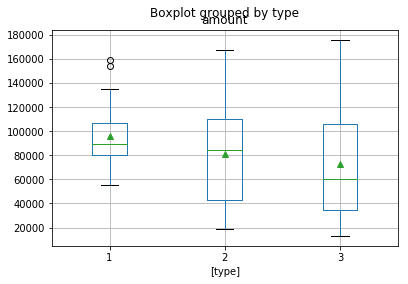

In [19]:
#타입별 사용금액 상자그림
sb_df.iloc[:, [1, 3]].boxplot(by='type', showmeans=True)

In [20]:
#타입별 평균
sb_df.amount.groupby(sb_df.type).mean()

type
1    95692.307692
2    81326.923077
3    73057.692308
Name: amount, dtype: float64

(0.92525315284729, 0.0029497381765395403)

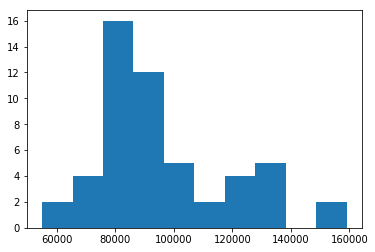

In [21]:
#타입별 금액 추출

data_t1 = sb_df['amount'][sb_df.type == 1] # my_df[my_df.type == 1].ix[:, ['type','amount']]
pyplot.figure(1)
pyplot.hist(data_t1, bins=10)
stats.skew(data_t1)
stats.shapiro(data_t1)

(0.9522883296012878, 0.03643041104078293)

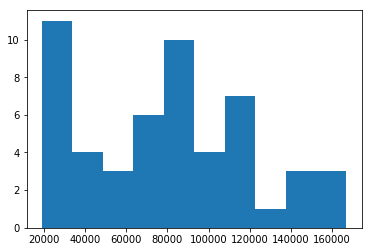

In [22]:
pyplot.figure(2)
data_t2 = sb_df['amount'][sb_df.type == 2]
pyplot.hist(data_t2, bins=10)
stats.skew(data_t2)
stats.shapiro(data_t2)

(0.8925897479057312, 0.00020913001208100468)

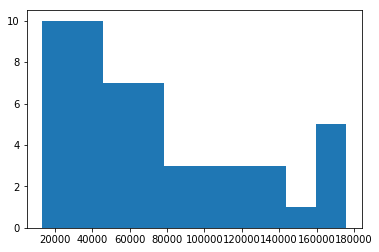

In [23]:
pyplot.figure(3)
data_t3 = sb_df['amount'][sb_df.type == 3]
pyplot.hist(data_t3, bins=10)
stats.skew(data_t3)
stats.shapiro(data_t3)

(0.9670653939247131, 0.15831419825553894)

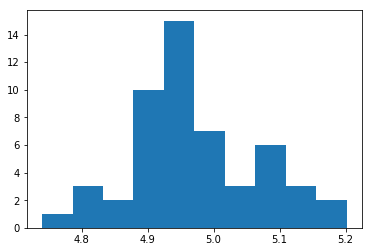

In [24]:
data_t1_ln = [math.log(x, 10) for x in data_t1]
pyplot.figure(4)
pyplot.hist(data_t1_ln, bins=10)
stats.skew(data_t1_ln)
stats.shapiro(data_t1_ln)

(0.9073035717010498, 0.0006559378234669566)

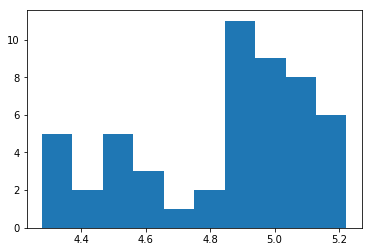

In [25]:
data_t2_ln = [math.log(x, 10) for x in data_t2]
pyplot.figure(5)
pyplot.hist(data_t2_ln, bins=10)
stats.skew(data_t2_ln)
stats.shapiro(data_t2_ln)

(0.9621309041976929, 0.09682846069335938)

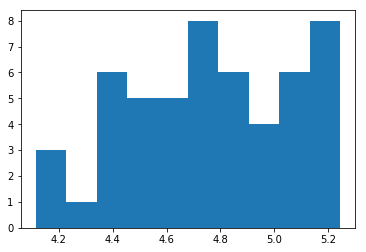

In [26]:
data_t3_ln = [math.log(x, 10) for x in data_t3]
pyplot.figure(6)
pyplot.hist(data_t3_ln, bins=10)
stats.skew(data_t3_ln)
stats.shapiro(data_t3_ln)

In [28]:
#사용분야 변수 빈도분석
sb_df.type.value_counts(normalize=False, sort=False)
sb_df.type.value_counts(normalize=True, sort=False)

1    0.333333
2    0.333333
3    0.333333
Name: type, dtype: float64

In [30]:
#분산의 동질성 검정
result1 = stats.levene(data_t1, data_t2, data_t3)
print(result1, "\n")

LeveneResult(statistic=9.905833643067448, pvalue=9.006485318301135e-05) 



C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.487
Date:                Thu, 12 Jul 2018   Prob (F-statistic):             0.0128
Time:                        20:56:33   Log-Likelihood:                -1868.9
No. Observations:                 156   AIC:                             3744.
Df Residuals:                     153   BIC:                             3753.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.569e+04   5407.169     17.697   

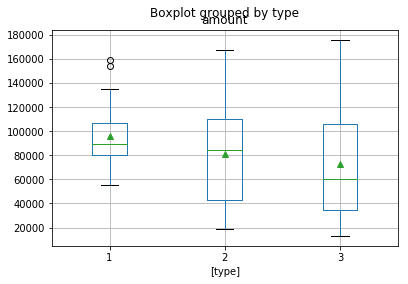

In [31]:
#세 모집단 평균(분산)차이 검정
Y = sb_df.amount.as_matrix()
X = sb_df.type.as_matrix()
#F = spm1d.stats.anova1(Y, X, equal_var=False).inference(alpha=0.05)
result1 = ols('amount ~ C(type)', data=sb_df).fit()
print(result1.summary(), "\n")
result2 = stats.f_oneway(data_t1, data_t2, data_t3)
print(result2, "\n")
result3 = sm.stats.multicomp.pairwise_tukeyhsd(sb_df.amount, sb_df.type)
print(result3, "\n")
sb_df.iloc[:, [1, 3]].boxplot(by='type', showmeans=1)

## end of documents